<a href="https://colab.research.google.com/github/sdr999/digit-prediction/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
import numpy as np
x_train.shape

(60000, 28, 28)

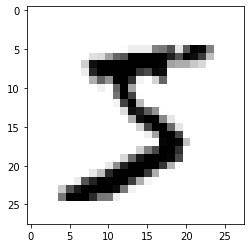

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0],cmap='binary')
plt.show()
y_train[0]
print(set(y_train))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)
print('y_train encoded shape=',y_train_encoded.shape)

y_train encoded shape= (60000, 10)


In [ ]:
train_x_reshaped=np.reshape(x_train,(60000,784))
test_x_reshaped=np.reshape(x_test,(10000,784))
print(set(train_x_reshaped[0]))
x_mean=np.mean(train_x_reshaped)
x_std=np.std(train_x_reshaped)
eps=1e-10
x_train_norm=(train_x_reshaped-x_mean)/(x_std+eps)
x_test_norm=(test_x_reshaped-x_mean)/(x_std+eps)
print(set(x_train_norm[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.757903791958

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense
model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3672 - accuracy: 0.8939
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1804 - accuracy: 0.9474
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9611


In [ ]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('test set accuracy=',accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1230 - accuracy: 0.9623
test set accuracy= 96.23000025749207


shape of pred= (10000, 10)


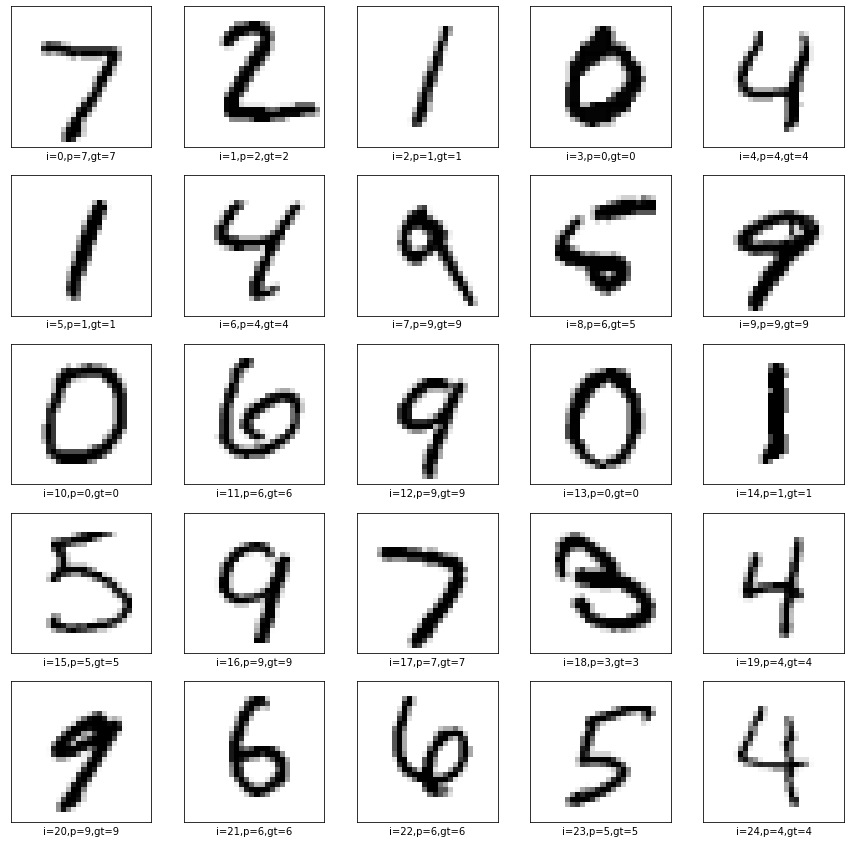

In [ ]:
pred=model.predict(x_test_norm)
print('shape of pred=',pred.shape)
plt.figure(figsize=(15,15))
start_index=0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  p=np.argmax(pred[start_index+i])
  gt=y_test[start_index+i]
  col='g'
  if p!=gt:
    col='r'
  plt.xlabel('i={},p={},gt={}'.format(start_index+i,p,gt,color=col))
  plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()